# SCPC 2009 Mobile Payment Analysis Replication in R

In [15]:
library(foreign)
library(memisc)

In [19]:
scpc2009 <- read.dta('SCPC2009.dta')
scpc2009 <- scpc2009[,c('r_weight','pa051_a',
                        'pa051_b','pa027_a',
                        'pa027_b','pa027_c',
                        'pa027_d','pa027_e',
                        'pa026','age','edu_lhs',
                        'edu_hs','edu_sc',
                        'edu_c','edu_pgs',
                        'inc_lt25','inc_2549',
                        'inc_5074','inc_7599',
                        'inc_100124','inc_125199',
                        'inc_gt200','white')]
head(scpc2009)
str(scpc2009)

r_weight,pa051_a,pa051_b,pa027_a,pa027_b,pa027_c,pa027_d,pa027_e,pa026,age,⋯,edu_c,edu_pgs,inc_lt25,inc_2549,inc_5074,inc_7599,inc_100124,inc_125199,inc_gt200,white
48.40744,2,2,2,2,2,2,2,2,56,⋯,0,0,1,0,0,0,0,0,0,1
19.69351,2,2,2,2,2,2,2,2,64,⋯,0,0,0,1,0,0,0,0,0,1
27.52127,2,2,1,1,2,1,2,1,70,⋯,0,0,0,1,0,0,0,0,0,1
21.77132,2,2,2,2,2,2,2,2,63,⋯,0,0,0,0,0,0,1,0,0,1
12.00401,2,2,2,2,2,2,2,2,52,⋯,0,1,0,0,0,1,0,0,0,1
15.07930,2,2,2,2,2,1,2,2,59,⋯,0,1,0,0,0,0,0,0,1,1


'data.frame':	2173 obs. of  23 variables:
 $ r_weight  : num  48.4 19.7 27.5 21.8 12 ...
 $ pa051_a   : int  2 2 2 2 2 2 2 NA 2 2 ...
 $ pa051_b   : int  2 2 2 2 2 2 2 NA 2 2 ...
 $ pa027_a   : int  2 2 1 2 2 2 2 2 2 2 ...
 $ pa027_b   : int  2 2 1 2 2 2 2 2 2 2 ...
 $ pa027_c   : int  2 2 2 2 2 2 2 2 2 2 ...
 $ pa027_d   : int  2 2 1 2 2 1 2 2 2 2 ...
 $ pa027_e   : int  2 2 2 2 2 2 2 2 2 2 ...
 $ pa026     : int  2 2 1 2 2 2 2 NA 2 1 ...
 $ age       : int  56 64 70 63 52 59 69 75 62 83 ...
 $ edu_lhs   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ edu_hs    : int  1 0 0 0 0 0 0 1 0 0 ...
 $ edu_sc    : int  0 1 1 1 0 0 1 0 1 1 ...
 $ edu_c     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ edu_pgs   : int  0 0 0 0 1 1 0 0 0 0 ...
 $ inc_lt25  : int  1 0 0 0 0 0 0 0 1 0 ...
 $ inc_2549  : int  0 1 1 0 0 0 1 1 0 1 ...
 $ inc_5074  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ inc_7599  : int  0 0 0 0 1 0 0 0 0 0 ...
 $ inc_100124: int  0 0 0 1 0 0 0 0 0 0 ...
 $ inc_125199: int  0 0 0 0 0 0 0 0 0 0 ...
 $ inc_gt200 : int

# MOBILE PAYMENTS VARIABLES - mpay

In [20]:
scpc2009$pa051_a[scpc2009$pa051_a==2] <- 0
scpc2009$pa051_b[scpc2009$pa051_b==2] <- 0
scpc2009$mpay <- scpc2009$pa051_a + scpc2009$pa051_b
summary(scpc2009$mpay)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.00000 0.00000 0.00000 0.02482 0.00000 2.00000     199 

In [21]:
scpc2009$mpay[scpc2009$mpay==2] <- 1
table(scpc2009$mpay)


   0    1 
1929   45 

# CONTACTLESS PAYMENT VARIABLE - cpay

In [22]:
scpc2009$pa027_a[scpc2009$pa027_a==2] <- 0
scpc2009$pa027_b[scpc2009$pa027_b==2] <- 0
scpc2009$pa027_c[scpc2009$pa027_c==2] <- 0
scpc2009$pa027_d[scpc2009$pa027_d==2] <- 0
scpc2009$pa027_e[scpc2009$pa027_e==2] <- 0
scpc2009$cpay <- scpc2009$pa027_a + scpc2009$pa027_b + 
    scpc2009$pa027_c + scpc2009$pa027_d + scpc2009$pa027_e
summary(scpc2009$cpay)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.3029  0.0000  5.0000      17 

In [23]:
scpc2009$cpay[scpc2009$cpay >= 1] <- 1
summary(scpc2009$cpay)
table(scpc2009$cpay)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.2277  0.0000  1.0000      17 


   0    1 
1665  491 

# MOBILE BANKING VARIABLE - mbank

In [24]:
scpc2009$pa026[scpc2009$pa026==2] <- 0
scpc2009$mbank <- scpc2009$pa026
summary(scpc2009$mbank)
table(scpc2009$mbank)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.00000 0.00000 0.00000 0.09746 0.00000 1.00000     285 


   0    1 
1704  184 

# AGE VARIABLE - age

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  18.00   41.00   52.00   50.89   61.00   90.00       1 

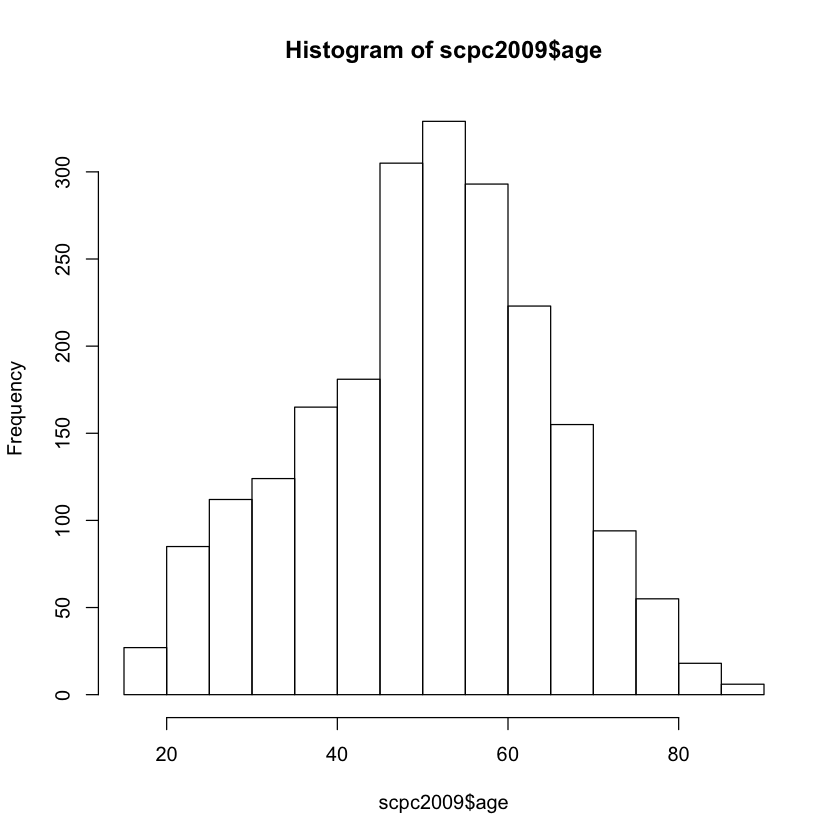

In [25]:
summary(scpc2009$age)
hist(scpc2009$age)

# EDUCATION VARIABLE - edlevel

In [26]:
scpc2009$edu_lhs[scpc2009$edu_lhs==2] <- 0
summary(scpc2009$edu_lhs)
table(scpc2009$edu_lhs)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.01887 0.00000 1.00000 


   0    1 
2132   41 

In [27]:
scpc2009$edu_hs[scpc2009$edu_hs==2] <- 0
scpc2009$edu_hs[scpc2009$edu_hs==1] <- 2
summary(scpc2009$edu_hs)
table(scpc2009$edu_hs)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.3046  0.0000  2.0000 


   0    2 
1842  331 

In [28]:
scpc2009$edu_sc[scpc2009$edu_sc==2] <- 0
scpc2009$edu_sc[scpc2009$edu_sc==1] <- 3
summary(scpc2009$edu_sc)
table(scpc2009$edu_sc)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   1.075   3.000   3.000 


   0    3 
1394  779 

In [29]:
scpc2009$edu_c[scpc2009$edu_c==2] <- 0
scpc2009$edu_c[scpc2009$edu_c==1] <- 4
summary(scpc2009$edu_c)
table(scpc2009$edu_c)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   1.051   4.000   4.000 


   0    4 
1602  571 

In [30]:
scpc2009$edu_pgs[scpc2009$edu_pgs==2] <- 0
scpc2009$edu_pgs[scpc2009$edu_pgs==1] <- 5
summary(scpc2009$edu_pgs)
table(scpc2009$edu_pgs)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   1.038   0.000   5.000 


   0    5 
1722  451 

In [31]:
scpc2009$edlevel <- scpc2009$edu_lhs + scpc2009$edu_hs +
    scpc2009$edu_sc + scpc2009$edu_c + scpc2009$edu_pgs
summary(scpc2009$edlevel)
table(scpc2009$edlevel)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   3.000   3.488   4.000   5.000 


  1   2   3   4   5 
 41 331 779 571 451 

# INCOME LEVEL VARIABLE - income

In [32]:
scpc2009$inc_lt25[scpc2009$inc_lt25==2] <- 0
scpc2009$inc_lt25[scpc2009$inc_lt25==1] <- 1
summary(scpc2009$inc_lt25)
table(scpc2009$inc_lt25)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.1352  0.0000  1.0000       6 


   0    1 
1874  293 

In [33]:
scpc2009$inc_2549[scpc2009$inc_2549==2] <- 0
scpc2009$inc_2549[scpc2009$inc_2549==1] <- 2
summary(scpc2009$inc_2549)
table(scpc2009$inc_2549)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.5159  2.0000  2.0000       6 


   0    2 
1608  559 

In [34]:
scpc2009$inc_5074[scpc2009$inc_5074==2] <- 0
scpc2009$inc_5074[scpc2009$inc_5074==1] <- 3
summary(scpc2009$inc_5074)
table(scpc2009$inc_5074)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.7531  3.0000  3.0000       6 


   0    3 
1623  544 

In [35]:
scpc2009$inc_7599[scpc2009$inc_7599==2] <- 0
scpc2009$inc_7599[scpc2009$inc_7599==1] <- 4
summary(scpc2009$inc_7599)
table(scpc2009$inc_7599)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.6294  0.0000  4.0000       6 


   0    4 
1826  341 

In [36]:
scpc2009$inc_100124[scpc2009$inc_100124==2] <- 0
scpc2009$inc_100124[scpc2009$inc_100124==1] <- 5
summary(scpc2009$inc_100124)
table(scpc2009$inc_100124)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.3646  0.0000  5.0000       6 


   0    5 
2009  158 

In [37]:
scpc2009$inc_125199[scpc2009$inc_125199==2] <- 0
scpc2009$inc_125199[scpc2009$inc_125199==1] <- 6
summary(scpc2009$inc_125199)
table(scpc2009$inc_125199)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.5122  0.0000  6.0000       6 


   0    6 
1982  185 

In [38]:
scpc2009$inc_gt200[scpc2009$inc_gt200==2] <- 0
scpc2009$inc_gt200[scpc2009$inc_gt200==1] <- 7
summary(scpc2009$inc_gt200)
table(scpc2009$inc_gt200)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   0.281   0.000   7.000       6 


   0    7 
2080   87 

In [39]:
scpc2009$income <- scpc2009$inc_lt25 + scpc2009$inc_2549 +
    scpc2009$inc_5074 + scpc2009$inc_7599 + scpc2009$inc_100124 +
    scpc2009$inc_125199 + scpc2009$inc_gt200
summary(scpc2009$income)
table(scpc2009$income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   2.000   3.000   3.192   4.000   7.000       6 


  1   2   3   4   5   6   7 
293 559 544 341 158 185  87 

# Race Dummy Variable for White - white

In [40]:
scpc2009$white[scpc2009$white==2] <- 0
summary(scpc2009$white)
table(scpc2009$white)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  1.0000  1.0000  0.8762  1.0000  1.0000 


   0    1 
 269 1904 

# New Dataframe with Coded Variables

In [41]:
df <- scpc2009[,c('r_weight','mpay','cpay','mbank',
                  'age','edlevel','income','white')]
str(df)
head(df)
summary(df)

'data.frame':	2173 obs. of  8 variables:
 $ r_weight: num  48.4 19.7 27.5 21.8 12 ...
 $ mpay    : num  0 0 0 0 0 0 0 NA 0 0 ...
 $ cpay    : num  0 0 1 0 0 1 0 0 0 0 ...
 $ mbank   : num  0 0 1 0 0 0 0 NA 0 1 ...
 $ age     : int  56 64 70 63 52 59 69 75 62 83 ...
 $ edlevel : num  2 3 3 3 5 5 3 2 3 3 ...
 $ income  : num  1 2 2 5 4 7 2 2 1 2 ...
 $ white   : num  1 1 1 1 1 1 0 1 1 1 ...


r_weight,mpay,cpay,mbank,age,edlevel,income,white
48.40744,0,0,0,56,2,1,1
19.69351,0,0,0,64,3,2,1
27.52127,0,1,1,70,3,2,1
21.77132,0,0,0,63,3,5,1
12.00401,0,0,0,52,5,4,1
15.07930,0,1,0,59,5,7,1


    r_weight           mpay             cpay            mbank        
 Min.   : 10.19   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.: 19.27   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000  
 Median : 26.61   Median :0.0000   Median :0.0000   Median :0.00000  
 Mean   : 45.90   Mean   :0.0228   Mean   :0.2277   Mean   :0.09746  
 3rd Qu.: 48.91   3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.00000  
 Max.   :776.70   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  
                  NA's   :199      NA's   :17       NA's   :285      
      age           edlevel          income          white       
 Min.   :18.00   Min.   :1.000   Min.   :1.000   Min.   :0.0000  
 1st Qu.:41.00   1st Qu.:3.000   1st Qu.:2.000   1st Qu.:1.0000  
 Median :52.00   Median :3.000   Median :3.000   Median :1.0000  
 Mean   :50.89   Mean   :3.488   Mean   :3.192   Mean   :0.8762  
 3rd Qu.:61.00   3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.:1.0000  
 Max.   :90.00   Max.   :5.000   Max.   :7.0

# Logistic Regression Weighted

In [42]:
head(df)

r_weight,mpay,cpay,mbank,age,edlevel,income,white
48.40744,0,0,0,56,2,1,1
19.69351,0,0,0,64,3,2,1
27.52127,0,1,1,70,3,2,1
21.77132,0,0,0,63,3,5,1
12.00401,0,0,0,52,5,4,1
15.07930,0,1,0,59,5,7,1


In [10]:
head(df1)

X,prim_key,internetlocation,familyincome,birthmonth,birthday,birthyear,cellphone,fr001_a,fr001_b,⋯,csh_house_no_mon_t_y,csh_freq_no_mon_t_y,csh_total_no_mon_t_y,csh_month_no_mon_t_y,csh_amnt_no_mon_t_y,de016_ho,rating_acceptance,rating_cost,rating_convenience,rating_security
0,2011016:1,1,4,12,10,52,1,5,5,⋯,100,2.000000,130,200.0000,100,20,2,1,3,4
1,2011018:1,1,11,12,24,44,1,5,5,⋯,NA,NA,NA,NA,NA,NA,3,1,2,4
2,2011018:2,1,10,11,23,38,1,2,1,⋯,3,4.348214,37,173.9286,40,NA,4,4,4,4
3,2011041:1,2,14,11,20,45,1,3,2,⋯,200,2.000000,260,120.0000,60,400,2,4,3,1
4,2011042:1,1,14,4,8,57,1,3,2,⋯,250,4.348214,450,869.6429,200,100,1,3,2,4
5,2011045:1,2,14,6,27,50,1,3,4,⋯,0,2.000000,50,300.0000,150,3000,1,2,3,4


In [53]:
fit1w <- glm(mpay ~ cpay + mbank + age + edlevel + income + white, 
             data = df, family = binomial)

In [58]:
summary(fit1w)


Call:
glm(formula = mpay ~ cpay + mbank + age + edlevel + income + 
    white, family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2910  -0.1873  -0.1175  -0.0915   3.2393  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.33502    0.85310  -2.737   0.0062 ** 
cpay         1.71593    0.35811   4.792 1.65e-06 ***
mbank        1.75732    0.36218   4.852 1.22e-06 ***
age         -0.02489    0.01272  -1.957   0.0503 .  
edlevel     -0.31601    0.19148  -1.650   0.0989 .  
income      -0.03059    0.11691  -0.262   0.7936    
white       -0.41695    0.40541  -1.028   0.3037    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 386.81  on 1871  degrees of freedom
Residual deviance: 308.61  on 1865  degrees of freedom
  (301 observations deleted due to missingness)
AIC: 322.61

Number of Fisher Scoring iterations: 7


In [55]:
confint(fit1w)

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-4.03728687,-0.6863757983
cpay,1.02993249,2.4454144378
mbank,1.04052079,2.4679480660
age,-0.05038165,-0.0003531266
edlevel,-0.69535854,0.0573746587
income,-0.26589796,0.1942746409
white,-1.18233364,0.4184601578


In [61]:
library(Zelig)

Warning message:
“package ‘Zelig’ was built under R version 3.4.1”Loading required package: survival


In [62]:
fit2 <- zelig(mpay ~ cpay + mbank + age + 
              edlevel + income + white,
              data = df, model = "relogit")

How to cite this model in Zelig:
  Christine Choirat, Christopher Gandrud, James Honaker, Kosuke Imai, Gary King, and Olivia Lau. 2017.
  relogit: Rare Events Logistic Regression for Dichotomous Dependent Variables
  in Christine Choirat, Christopher Gandrud, James Honaker, Kosuke Imai, Gary King, and Olivia Lau,
  "Zelig: Everyone's Statistical Software," http://zeligproject.org/


In [65]:
summary(fit2)

Model: 

Call:
z5$zelig(formula = mpay ~ cpay + mbank + age + edlevel + income + 
    white, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3065  -0.1965  -0.1242  -0.0970   3.2037  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept) -2.27758    0.85310  -2.670  0.00759
cpay         1.68315    0.35811   4.700 2.60e-06
mbank        1.73840    0.36218   4.800 1.59e-06
age         -0.02416    0.01272  -1.900  0.05749
edlevel     -0.30849    0.19148  -1.611  0.10717
income      -0.02689    0.11691  -0.230  0.81812
white       -0.43812    0.40541  -1.081  0.27983

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 386.81  on 1871  degrees of freedom
Residual deviance: 308.61  on 1865  degrees of freedom
  (301 observations deleted due to missingness)
AIC: 322.61

Number of Fisher Scoring iterations: 7

Next step: Use 'setx' method


In [66]:
fit2x <- setx(fit2)

In [67]:
fit2s <- sim(fit2, x=fit2x)
summary(fit2s)


 sim x :
 -----
ev
           mean          sd        50%        2.5%      97.5%
[1,] 0.01131207 0.002994068 0.01085228 0.006824568 0.01823884
pv
         0     1
[1,] 0.986 0.014


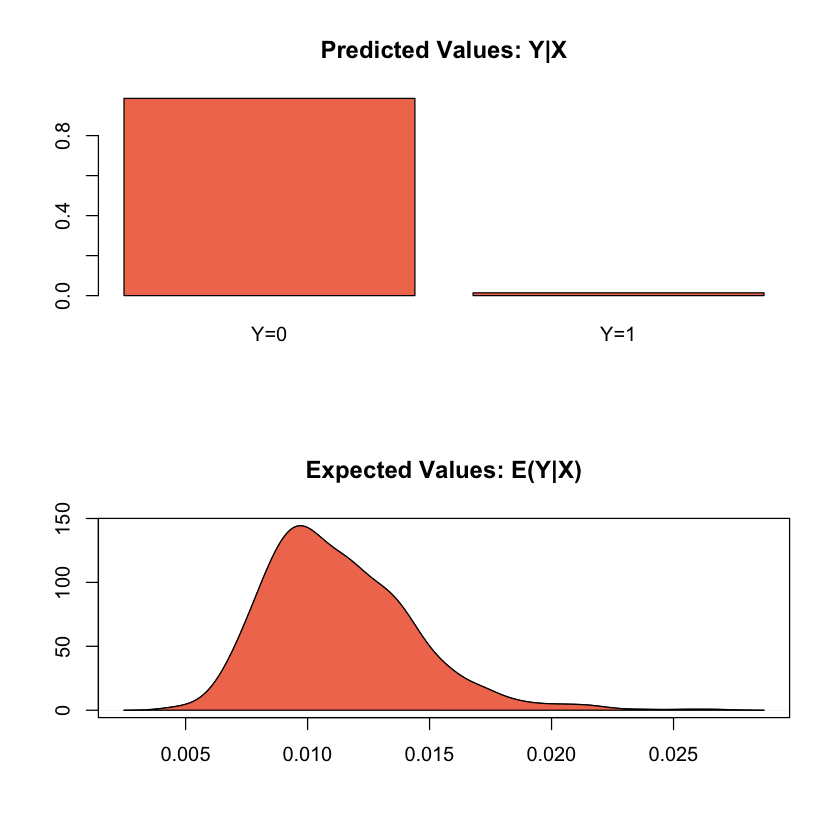

In [68]:
plot(fit2s)